In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

SCRIPT_DIR = os.path.dirname(os.path.abspath('C:/Users/dylan/OneDrive/Documents/Coding/LearningNumericalMethods/Chapter 3/Ch3_3.4_Fourier_Analysis.ipynb'))
sys.path.append(os.path.dirname(SCRIPT_DIR))
from Fourier.fourierAlgos import *
from RungeKutta.rk4Algo import dsbRK4

plt.style.use('seaborn-v0_8-bright')
plt.rcParams['axes.grid'] = True
plt.rcParams["figure.autolayout"] = True
plt.rcParams['lines.linewidth'] = 0.75

### Question 1

Consider a particle oscillating in the nonharmonic potential

\begin{equation}
    V(x) = \frac{1}{p} k |x|^p, \quad p \neq 2
\end{equation}

While nonforced oscillations in this potential are always periodic, they are not sinusoidal.

<font size='-0.5'> a. For p=12, decomposed the solution x(t) into its Fourier components.

b. Determine the components that contribute at least 10%.

c. Check that resuming the components reproduces the input signal.</font>

##### Answer

Let's first remake recreat the model and apply the RK4 model to generate the signal.

In [21]:
w0 = 1

def model2(t, y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system.

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through
    g : float
        Sets the gamma value in the Duffing equation
    Returns
    -------
    The velocities of the particular coordinates of interest.
    """
    #Figures out how many dimensions the system is based on the dimension of the array 
    l = y.size
    #creates an array of velocities to store the system of First order ODEs
    v = np.empty([l])
    ## This is where the system of ODEs would go. You would have them written as v[0], v[1], ...

    p = 12

    v[0] = y[1]
    v[1] = - (w0*w0)*(y[0]**(p-1))

    return v

The code below will generate the oscillation using the RK4 method, which will be fourier analyzed. Keep in mind that I generated a signal where $y(0) \simeq y(N)$, but I've zoomed in on a specific amount of time in the graphing.

In [22]:
h = 0.1
N = 993

q, t = dsbRK4([0,w0*1], model2, 2, N, h)
x, v = q

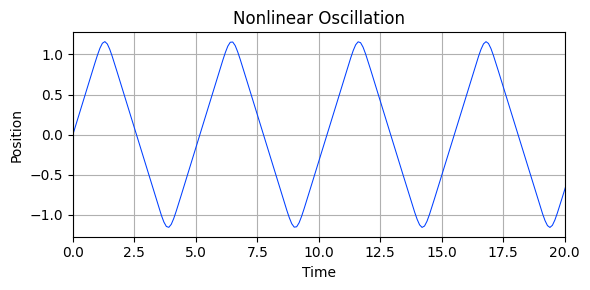

In [23]:
plt.figure(figsize = (6, 3))
plt.xlim(0,20)
plt.title('Nonlinear Oscillation')
plt.ylabel('Position')
plt.xlabel('Time')
plt.plot(t, x)
plt.show()

With the position function now generated, let's apply the <i>Discrete Fourier Transform</i> to decompose into the Fourier component frequencies.

In [24]:
omegas, Yn = DFT(x, len(x), h)

<i><b>How can we determine the components that contribute at least $10\%$ to the entire position function?</b></i>

To do this, we need to figure out the maximum $Y_n$ value found and divide each Fourier component by the maximum. Then, we can search for all the Fourier component ratios $ Y_n/Y_{max} > 0.1$

In [25]:
min_Yn = []
min_omegas = []
ratio = []

max_Yn = max(abs(Yn))

for i in range(0, len(Yn)):
    if abs(Yn[i])/max_Yn > 0.09:
        min_omegas.append(omegas[i])
        ratio.append(Yn[i]/max_Yn)

print("Omegas Contributing at least 9% : " + str(min_omegas[0:len(min_omegas)//2]))
print("Ratios of Contribution: " + str(ratio[0:len(min_omegas)//2]))

Omegas Contributing at least 9% : [1.2022207536395983, 3.606662260918795]
Ratios of Contribution: [(0.30282358971372636-0.953046627145223j), (-0.07263120028897097+0.05514949369846275j)]


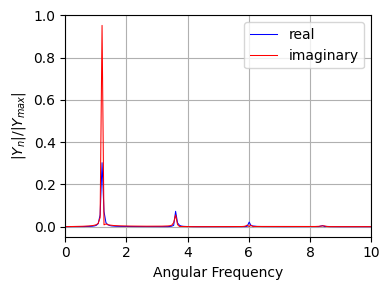

In [26]:
plt.figure(figsize = (4, 3))
plt.xlim(0,10)
plt.plot(omegas, abs(Yn.real)/max_Yn, 'b', label = 'real')
plt.plot(omegas, abs(Yn.imag)/max_Yn, 'r', label = 'imaginary')
plt.ylabel("$|Y_n|/|Y_{max}|$")
plt.xlabel('Angular Frequency')
plt.legend()
plt.show()

<i><b>What can we gather from the analysis above?</b></i>

Notice the peaks in Fourier components. These correspond to the angular frequencies that contribute the most to the Fourier series that generate the nonlinear oscillation.

<i><b>How can I believe that these are the frequencies that make up the most of the </b></i>

Let's use the frequencies that contribute at least 9% of the oscillation to write the first few terms of the Fourier series. Let's also compare it to the <i>inverse Discrete Fourier Transform</i>

In [27]:
tmin = np.arange(0, N*h, h)
ymin = 0.953046627145223*np.sin(1.2022207536395983*tmin) - 0.05514949369846275*np.sin(3.606662260918795*tmin)

t, yk = invDFT(Yn, h)

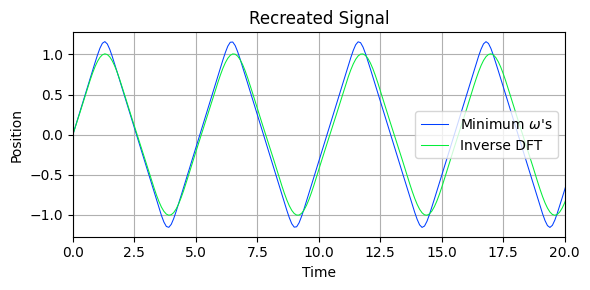

In [28]:
plt.figure(figsize = (6, 3))
plt.xlim(0,20)
plt.plot(t, yk, label = 'Minimum $\omega$\'s')
plt.plot(tmin, ymin, label = 'Inverse DFT')
plt.title("Recreated Signal")
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

As can be seen from the graphs above, the signal can roughly be recreated only using the $\omega$'s that appear to dominate the Fourier series. However, including all the possible $\omega$'s at their respective strengths (as done by the inverse DFT method) accurately reproduces the original oscillation being analyzed.

### Question 2

Recall the perturbed harmonic oscillator

\begin{equation}
    V(x) \simeq \frac{1}{2}kx^2 \left( 1-\frac{2}{3} \alpha x \right) \quad \rightarrow \quad \ddot{x} = \omega_0^2 \left(-x+\alpha x^2\right)
\end{equation}

In [29]:
def model1(t, y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system.

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through
    g : float
        Sets the gamma value in the Duffing equation
    Returns
    -------
    The velocities of the particular coordinates of interest.
    """
    #Figures out how many dimensions the system is based on the dimension of the array 
    l = y.size
    #creates an array of velocities to store the system of First order ODEs
    v = np.empty([l])
    ## This is where the system of ODEs would go. You would have them written as v[0], v[1], ...

    alpha = 0.15

    v[0] = y[1]
    v[1] = -(w0*w0)*(y[0]-alpha*y[0]*y[0])

    return v

Let's explore a Fourier analysis of this particular oscillation. Firstly, we need to obviously generate the oscillation by solving for the EoM using the RK4 method.

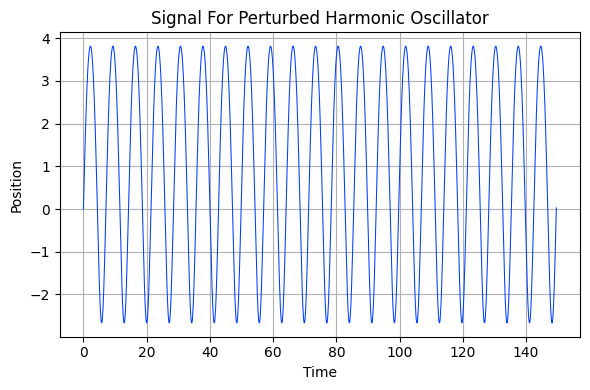

In [38]:
N = 1497 ; h = 0.1

q, t = dsbRK4([0, w0*3], model1, 2, N, h)
y, v = q

plt.figure(figsize = (6, 4))
plt.plot(t, y)
plt.title('Signal For Perturbed Harmonic Oscillator')
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

From here, we can apply the discrete fourier transform algorithm to decompose the signal into the particular frequencies

In [31]:
omegas, Yn = DFT(y, len(y), h)

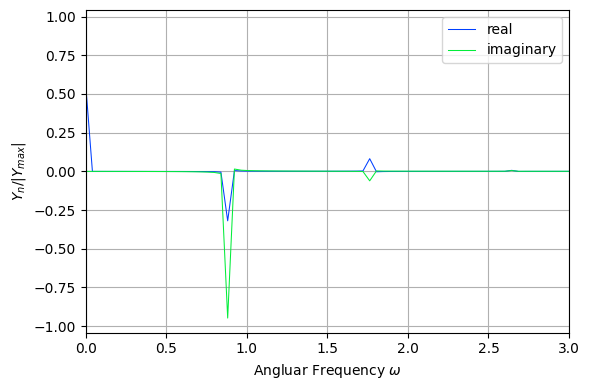

In [32]:
plt.figure(figsize = (6,4))
plt.xlim(0,3)
plt.plot(omegas, Yn.real/max(abs(Yn)) ,label = 'real')
plt.plot(omegas, Yn.imag/max(abs(Yn)), label = 'imaginary')
plt.xlabel("Angluar Frequency $\omega$")
plt.ylabel("$Y_n/|Y_{max}|$")
plt.legend()
plt.show()

<b><i>Whoa, why does $\omega = 0$ have a strong Fourier coefficient?? And we explain the other frequencies on the graph?</i></b>

I was very confused by everything I saw on the Fourier analysis graph. However, I was able to gain somewhat of an understanding about the decomposition:

1. $\omega = 0$ for the real part of the Fourier transform implies there's a term such that $a_1\cos(0t) = a_1$. This means there's some non-oscillatory term in our Fourier analysis. The reason I think such a term exists is because the original EoM looks like it's equilibrium position is shifted upwards.
2. The large imaginary peak coincides closely with the original sinusiodal frequency of the oscillation.

To verify these ideas, we'll construct the signal using only the components of the Fourier analysis that contribute at least $5\%$ to the Fourier series. 

In [33]:
max_Yn = max(abs(Yn))
req_Yn = []
req_omegas = []
ratio = []

for i in range(0, len(Yn)):
    if abs(Yn[i])/max_Yn > 0.05:
        req_omegas.append(omegas[i])
        ratio.append(Yn[i]/max_Yn)

req_omegas = np.array(req_omegas)
ratio = np.array(ratio)

xmin = 0
tmin = np.arange(0, N*h, h)


for i in range(0,len(req_omegas)):
    xmin += ratio.real[i]*np.cos(req_omegas[i]*tmin) - ratio.imag[i]*np.sin(req_omegas[i]*tmin)

t, y = invDFT(Yn, h)

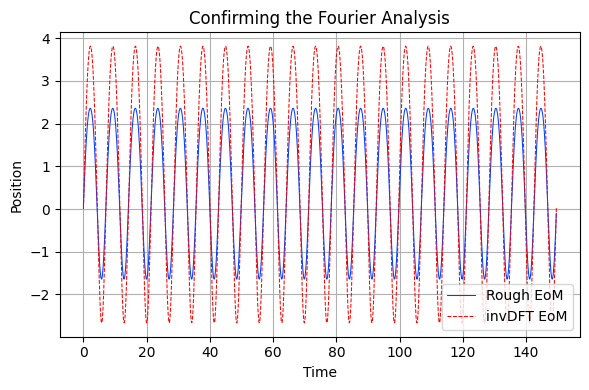

In [34]:
plt.figure(figsize = (6,4))
plt.title("Confirming the Fourier Analysis")
plt.plot(t, xmin, label = "Rough EoM")
plt.plot(t, y, 'r--', label = "invDFT EoM")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend(loc = "lower right")
plt.show()

### Question 3

The next step is to attempt to apply the Fourier analysis code to the choatic pendulum behaviors. To do this, we needed to copy our code from <b>3.3 Realistic Pendula</b> to be able to analyze the EoMs

In [35]:
def realrealPen(t, y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system. This models a realistic pendulum with friction and a driving force.

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through
    g : float
        Sets the gamma value in the Duffing equation
    Returns
    -------
    The velocities of the particular coordinates of interest.
    """
    # Creates an array of velocities to store the system of First order ODEs
    v = np.empty([y.size])
    # This is where the system of ODEs would go. You would have them written as v[0], v[1], ...

    v[0] = y[1]
    v[1] = -(w0**2)*np.sin(y[0]) - alpha*y[1] + f*np.cos(w*t)

    return v


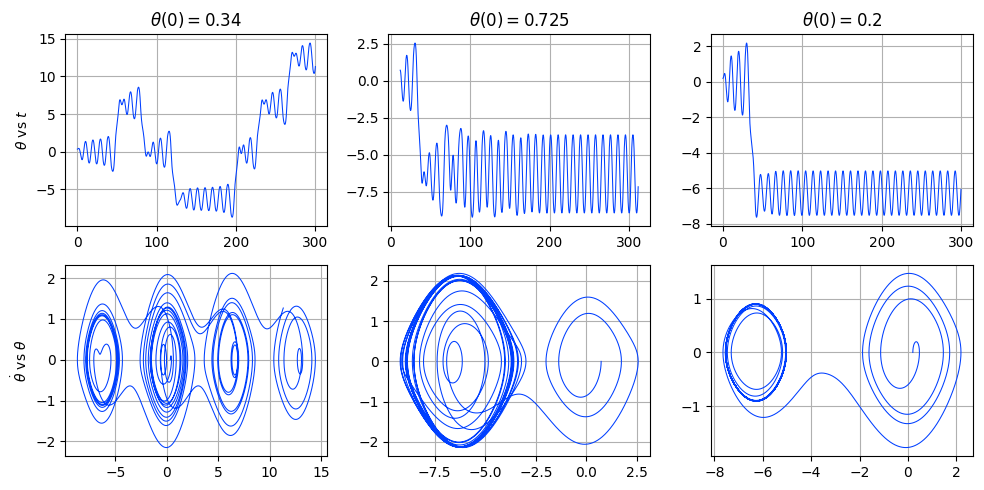

In [36]:
thetas = [0.34, 0.725, 0.2]
w0 = 1 ; alpha = 0.2 ; f = 0.5 ; w = 2/3 ; N = 30000 ; h = 0.01

for i in range(3):
    vars()['coords'+str(i)] , vars()['t'+str(i)]= dsbRK4([thetas[i], 0], realrealPen, 2, N, h)
    vars()['theta'+str(i)], vars()['thetadot'+str(i)] = vars()['coords'+str(i)][0], vars()['coords'+str(i)][1]

fig, axs = plt.subplots(2, 3, figsize=(10,5))

axs[0][0].plot(t0, theta0)
axs[0][0].set_ylabel('$\\theta$ vs $t$')
axs[0][0].set_title('$\\theta(0) = {}$'.format(round(thetas[0], 4)))

axs[1][0].plot(theta0, thetadot0)
axs[1][0].set_ylabel('$\\dot{\\theta}$ vs $\\theta$')

axs[0][1].plot(t1, theta1)
axs[0][1].set_title('$\\theta(0) = {}$'.format(round(thetas[1], 4)))

axs[1][1].plot(theta1, thetadot1)

axs[0][2].plot(t2, theta2)
axs[0][2].set_title('$\\theta(0) = {}$'.format(round(thetas[2], 4)))

axs[1][2].plot(theta2, thetadot2)

plt.show()

Now that we have our EoMs for different chaotic behavior, let's attempt to deduce the frequency spectrum of the pendulums.

In [37]:
for i in range(3):
    vars()['omegas'+str(i)] = fftfreq(N, h)
    vars()['Yn'+str(i)] = fft(vars()['theta'+str(i)])

NameError: name 'fftfreq' is not defined

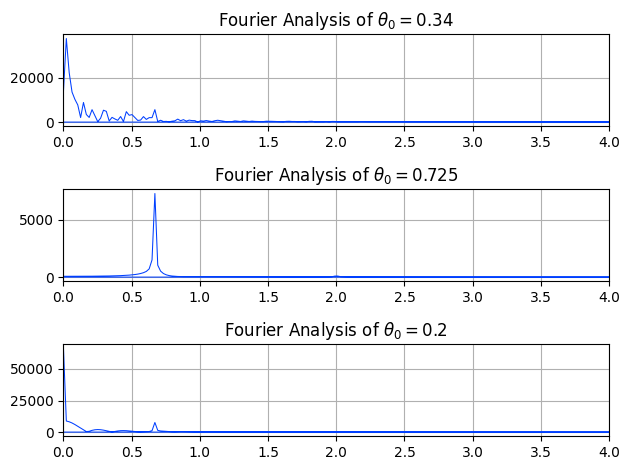

In [ ]:
fig, ax = plt.subplots(3,1)

for i in range(3):
    x = 2*pi*vars()['omegas'+str(i)]
    y = (1/(sqrt(2*pi)))*vars()['Yn'+str(i)]

    ax[i].set_xlim(0,4)
    ax[i].set_title("Fourier Analysis of $\\theta_0 = $" + str(thetas[i]))
    ax[i].plot(x, abs(y))
    
plt.show()

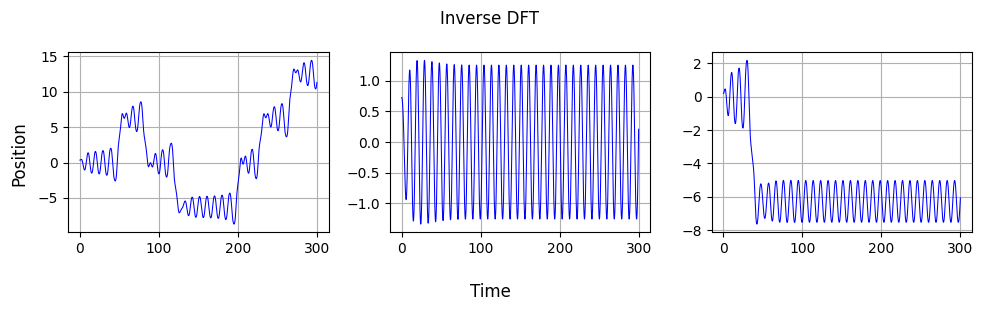

In [ ]:
fig1, axis = plt.subplots(1, 3, figsize = (10,3))

for i in range(3):
    y = ifft(vars()['Yn'+str(i)])

    axis[i].plot(t0, y.real, 'b')

fig1.suptitle('Inverse DFT')
fig1.supxlabel('Time')
fig1.supylabel('Position')
plt.show()